In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('seaborn')

1. Jovanka Cathrynn Thomas 23102010021
2. Alina Florencia Karuniawati 23102010073

Dataset diambil dari : https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

Case :

1. Ada seorang pengusaha yang sebelumnya belum pernah bergerak di bidang food & beverage dan dalam beberapa waktu ke depan ia berencana untuk mendirikan sebuah restaurant di Bangalore, India. Dalam hal ini ia ingin mengetahui faktor-faktor apa saja yang harus dipertimbangkan dan mengetahui preferences masyarakat di Bangalore terhadap segala sesuatu yang terkait dengan restaurant.
2. Selain itu, pengusaha tersebut juga tertarik untuk membuka franchise di bidang food & beverage dan dalam hal ini ia ingin mengetahui restaurant apa yang cocok untuk dikembangkan sebagai franchise.

Melihat case di atas, tujuan dari penelitian kami adalah :
1. Mengetahui faktor apa saja yang harus dipertimbangkan ketika ingin mendirikan sebuah restaurant
2. Mengetahui consumer behavior dari masyarakat Bangalore terhadap hal-hal yang terkait dengan restaurant
3. Merekomendasikan salah satu restaurant yang dapat dikembangkan sebagai franchise

# Read Data

In [4]:
df_initial = pd.read_csv('zomato.csv')

In [5]:
df_initial

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [6]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Berdasarkan informasi di atas dapat dilihat masih ada kolom-kolom yang memiliki tipe data tidak sesuai dan ada missing value

# General Data Cleaning

## Rate

### Melihat detail data untuk mengetahui apa yang harus diperbaiki

In [7]:
df_initial.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- Dapat dilihat bahwa pada kolom rate terdapat inputan yang tidak sesuai ('NEW' dan '-')
- Terdapat bentuk penulisan yang kurang efektif.

notes:

Maksud dari bentuk penulisan yang kurang efektif : 

Melihat bahwa batas maximum rate pada semua data adalah 5, maka penulisan rating dapat menjadi lebih efektif apabila dilakukan penghapusan pada beberapa index ('/5' dan '(space)/5').

### Membuang data-data yang memiliki rate 'NEW' dan '-'

In [8]:
df_initial = df_initial[(df_initial['rate']!='NEW')&(df_initial['rate']!='-')]

Keterangan :

Data-data dengan rate 'NEW' dan '-' dibuang karena tidak ada jumlah votes yang masuk, sehingga nilai rating tidak tersedia. Hal tersebut mengakibatkan data-data tersebut tidak dapat digunakan untuk analisis.

### Mengubah format penulisan rating

In [9]:
df_initial['rate']=df_initial['rate'].str[0:3]

Keterangan : 
Mengubah format penulisan rating agar dapat dijadikan float

In [10]:
df_initial['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', nan, '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

Dapat dilihat bahwa bentuk penulisan kolom rate telah berhasil diubah

### Mengubah tipe data rate dari object ke float

In [11]:
df_initial['rate']=df_initial['rate'].astype('float')

In [12]:
df_initial['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

Dapat dilihat bahwa tipe data kolom rate telah berhasil diubah menjadi float

## Approx_cost(for two people)	

In [13]:
df_initial['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

Dari data perkiraan harga untuk 2 orang dapat dilihat bahwa penulisan harga masih dalam bentuk string (terdapat tanda ','). Oleh karena itu, kami akan menghilangkan tanda baca tersebut agar tipe data dapat diubah menjadi float

### Menghapus tanda ','

In [14]:
df_initial['approx_cost(for two people)'] = df_initial['approx_cost(for two people)'].str.replace(',','')

In [15]:
df_initial['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '80', '50', '190', '1700', nan, '180', '1350', '2200', '1400',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '3200', '60', '240', '6000', '1050', '2300',
       '4100', '5000', '3700', '1650', '2700', '4500', '140', '360'],
      dtype=object)

Berdasarkan data di atas dapat dilihat bahwa format penulisan approx_cost(for two people) sudah berhasil diubah

### Mengubah tipe data menjadi float

In [16]:
df_initial['approx_cost(for two people)'] = df_initial['approx_cost(for two people)'].astype('float')

In [17]:
df_initial['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,   nan,  180., 1350., 2200., 1400.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000.,
       3700., 1650., 2700., 4500.,  140.,  360.])

Dapat dilihat bahwa tipe data telah berhasil diubah menjadi float

# Analisis

## Remove Unnecessary Column

In [18]:
df = df_initial.drop(['url','address','phone','listed_in(city)','menu_item','reviews_list', 'dish_liked'], axis=1)

Keterangan :

Kolom url, address, phone, listed_in(city), reviews_list, dish_liked, dan menu_item adalah kolom-kolom yang tidak relevan dengan analisis yang akan kami lakukan pada correlation, rating distribution, price distribution, part 1 dan part 3, sehingga kolom-kolom tersebut dapat dihapus

## Correlation Between All Columns 

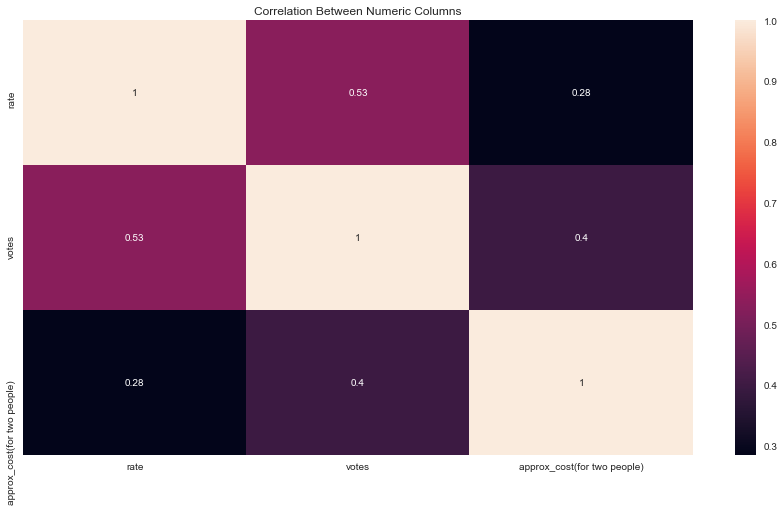

In [19]:
corr =df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Between Numeric Columns')
plt.show()

Berdasarkan heatmap di atas dapat dilihat bahwa hubungan yang paling tinggi ditunjukkan oleh votes dengan rate, yaitu sebesar 0.53

## Rating Distribution

In [20]:
df_rating = df.dropna()

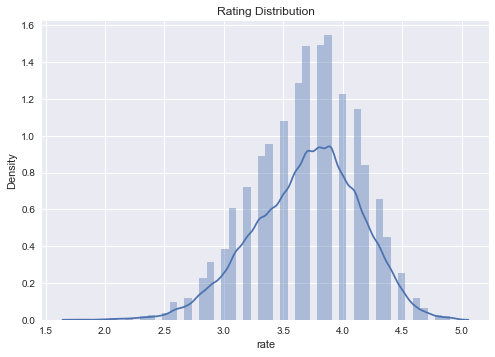

In [21]:
sns.distplot(df_rating['rate'])
plt.title('Rating Distribution')
plt.savefig('Rating Distribution')
plt.show()

## Calculate X̄ (rata-rata rating) - 1S (standar deviasi dari rating)

In [22]:
x_s = np.round(float(df_rating['rate'].mean() - df_rating['rate'].std()),2)

In [23]:
x_s

3.26

## Calculate X̄ (rata-rata rating) + 1S (standar deviasi dari rating)

In [24]:
x_ss = np.round(float(df_rating['rate'].mean() + df_rating['rate'].std()),2)

In [25]:
x_ss

4.14

## Jumlah data yang berada di antara  X̄ - 1S dan X̄ + 1S dan persentasenya

In [26]:
jum = len(df_rating[(df_rating['rate']>x_s) &(df_rating['rate']<x_ss)])

In [27]:
jum

28433

In [28]:
pers = (jum/len(df_rating))*100

In [29]:
np.round(pers,2)

68.91

Berdasarkan plot dan perhitungan di atas dapat dilihat beberapa hal sebagai berikut:
1. Secara umum, 68.91% dari orang yang memberikan rating pada restaurant di Bangalore angkanya berkisar antara 3.26 hingga 4.14
2. Jarang di temui orang yang memberikan rating di atas 4.5 hingga 5

## Price Distribution

In [30]:
df_price = df.dropna()

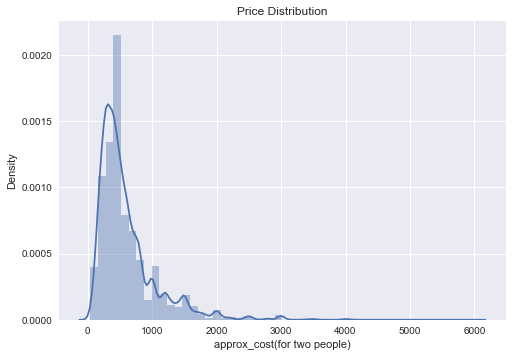

In [31]:
sns.distplot(df_price['approx_cost(for two people)'])
plt.title('Price Distribution')
plt.savefig('Price Dist')
plt.show()

## Calculate X̄ (rata-rata cost untuk 2 orang) - 1S (standar deviasi dari cost untuk 2 orang)

In [32]:
x_s1 = float(df_price['approx_cost(for two people)'].mean() - df_price['approx_cost(for two people)'].std())

In [33]:
x_s1

138.9710901914869

## Calculate X̄ (rata-rata cost untuk 2 orang) + 1S (standar deviasi dari cost untuk 2 orang)

In [34]:
x_ss1 = float(df_price['approx_cost(for two people)'].mean() + df_price['approx_cost(for two people)'].std())

In [35]:
x_ss1

1068.8570367018558

## Jumlah data yang berada di antara  X̄ - 1S dan X̄ + 1S dan persentasenya

In [36]:
jum = len(df_price[(df_price['approx_cost(for two people)']>x_s1) &(df_price['approx_cost(for two people)']<x_ss1)])

In [37]:
jum

35470

In [38]:
pers = (jum/len(df_price))*100

In [39]:
pers

85.96078811526064

Berdasarkan plot dan perhitungan di atas dapat dilihat beberapa hal sebagai berikut:
1. Approx cost for two people memiliki jenis distribusi right-skewed
2. Secara umum, hampir 86% restaurant di kota Bangalore India mematok harga perkiraan makanan untuk 2 orang di antara INR 138.97 dan INR 1068.86

# Part 1

## Apakah Adanya Jasa Online Order Berpengaruh terhadap Rating Restaurant?

#### Ambil kolom online_order dan rate

In [40]:
df1 =df[['online_order','rate','votes']]

In [41]:
df1

,online_order,rate,votes
0,Yes,4.1,775
1,Yes,4.1,787
2,Yes,3.8,918
3,No,3.7,88
4,No,3.8,166
...,...,...,...
51712,No,3.6,27
51713,No,NaN,0
51714,No,NaN,0
51715,No,4.3,236


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  49440 non-null  object 
 1   rate          41665 non-null  float64
 2   votes         49440 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


Berdasarkan informasi di atas dapat dilihat bahwa masih terdapat missing values

## Remove Missing Value

In [43]:
df1.dropna(inplace=True)

In [44]:
df1

,online_order,rate,votes
0,Yes,4.1,775
1,Yes,4.1,787
2,Yes,3.8,918
3,No,3.7,88
4,No,3.8,166
...,...,...,...
51709,No,3.7,34
51711,No,2.5,81
51712,No,3.6,27
51715,No,4.3,236


#### Proporsi Restaurant yang menyediakan jasa delivery online dan tidak

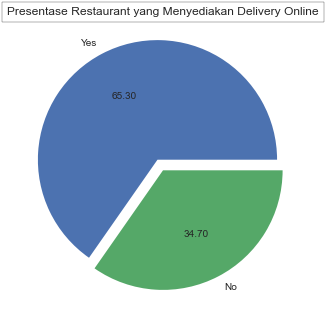

In [45]:
explode=[0.1,0]
df1['online_order'].value_counts().plot(kind='pie',explode=explode,autopct ='%.2f')
plt.ylabel('')
plt.title("Presentase Restaurant yang Menyediakan Delivery Online", bbox={'facecolor':'1', 'pad':5})
plt.savefig('OnlineOrder')
plt.show()

Proporsi restaurant di Bangalore yang menyediakan jasa online order lebih banyak daripada yang tidak menyediakan. Angka tersebut mencapai 65.30% dari keseluruhan

In [46]:
df1gr = df1[['rate','online_order','votes']].groupby(['online_order'], as_index=False).agg({'rate':'mean','votes':'sum'})

In [47]:
df1gr

,online_order,rate,votes
0,No,3.65907,5313744
1,Yes,3.72244,9337879


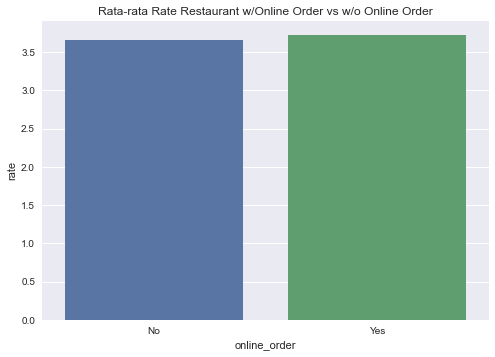

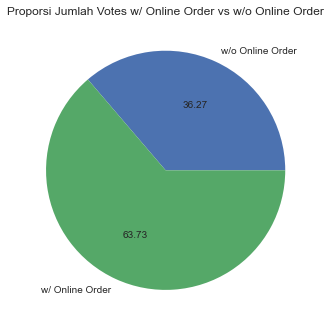

In [48]:
sns.barplot(x="online_order", y="rate", data=df1gr)
plt.title('Rata-rata Rate Restaurant w/Online Order vs w/o Online Order')
plt.savefig('GroupbyOnlineRate')
plt.show()

df1gr.votes.plot(kind='pie', labels=['w/o Online Order', 'w/ Online Order'],  autopct='%.2f')
plt.title('Proporsi Jumlah Votes w/ Online Order vs w/o Online Order')
plt.ylabel('')
plt.savefig('GroupbyOnlineVote')
plt.show()

Berdasarkan bar chart  di atas secara umum dapat dilihat bahwa rata-rata rating restaurant yang memiliki jasa delivery order online memiliki rata-rata rating yang lebih tinggi. Akan tetapi, selisih rata-rata rating dengan restaurant yang tidak menyediakan jasa tersebut sangat kecil  (w/ Online Order : 3.72 dan w/o Online order : 3.66) meskipun berdasarkan pie chart di atas proporsi jumlah orang yang memberikan vote pada restaurant yang provide online order lebih banyak. Oleh karena itu, dapat dikatakan bahwa adanya jasa online order tidak memberikan pengaruh yang signifikan pada rating restaurant di kota Bangalore, tetapi berpengaruh pada jumlah votes yang diberikan kepada restaurant

# Apakah Adanya Fasilitas book_table Berpengaruh terhadap Rating Restaurant?

## Ambil kolom book_table dan rate

In [49]:
df3 =df[['book_table','rate','votes']]
df3

,book_table,rate,votes
0,Yes,4.1,775
1,No,4.1,787
2,No,3.8,918
3,No,3.7,88
4,No,3.8,166
...,...,...,...
51712,No,3.6,27
51713,No,NaN,0
51714,No,NaN,0
51715,Yes,4.3,236


In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book_table  49440 non-null  object 
 1   rate        41665 non-null  float64
 2   votes       49440 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


Berdasarkan informasi di atas masih terdapat missing values 

## Remove Missing Value

In [51]:
df3.dropna(inplace=True)
df3

,book_table,rate,votes
0,Yes,4.1,775
1,No,4.1,787
2,No,3.8,918
3,No,3.7,88
4,No,3.8,166
...,...,...,...
51709,No,3.7,34
51711,No,2.5,81
51712,No,3.6,27
51715,Yes,4.3,236


## Proporsi Restaurant w/ Book Table vs w/o Book Table

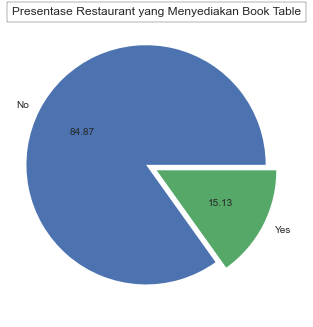

In [52]:
explode=[0.1,0]
df3['book_table'].value_counts().plot(kind='pie',explode=explode,autopct ='%.2f')
plt.ylabel('')
plt.title("Presentase Restaurant yang Menyediakan Book Table", bbox={'facecolor':'1', 'pad':5})
plt.savefig('BookTable')
plt.show()

Berdasarkan chart di atas dapat dilihat bahwa hampir 85% restaurant di Bangalore tidak menyediakan fasilitas bagi pengunjung untuk book table.

## Rata-rata Rating w/ Book Table vs w/o Book Table

In [53]:
df3gr = df3[['rate','book_table','votes']].groupby(['book_table'], as_index=False).agg({'rate':'mean','votes':'sum'})

In [54]:
df3gr

,book_table,rate,votes
0,No,3.621470,7267477
1,Yes,4.143464,7384146


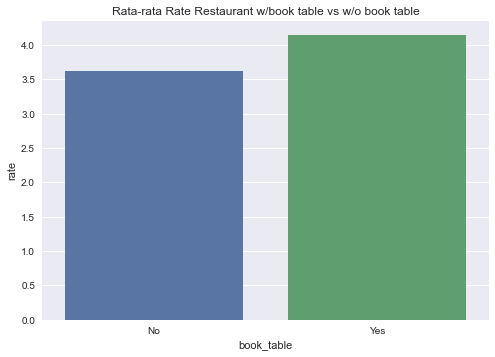

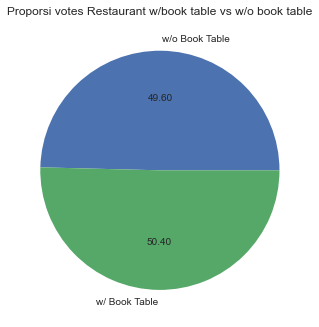

In [55]:
sns.barplot(x="book_table", y="rate", data=df3gr)
plt.title('Rata-rata Rate Restaurant w/book table vs w/o book table')
plt.savefig('RateGroupbyBookTable')
plt.show()

df3gr.votes.plot(kind='pie', labels=['w/o Book Table', 'w/ Book Table'],  autopct='%.2f')
plt.ylabel('')
plt.title('Proporsi votes Restaurant w/book table vs w/o book table')
plt.savefig('VotesGroupbyBookTable')
plt.show()

Berdasarkan bar chart di atas dapat dilihat bahwa, rata-rata restaurant yang menyediakan fasilitas booking terlebih dahulu memiliki rating yang lebih tinggi (sekitar 4.1). Oleh karena itu, dapat dikatakan bahwa adanya booking_table memengaruhi rating sebuah restaurant di kota Bangalore. Selain itu, juga dapat dilihat bahwa adanya booking table tidak memberikan pengaruh yang signifikan pada jumlah votes.

# Best Cuisines in Bangalore

## Ambil kolom cuisines, rate, votes, approx_cost

In [56]:
df6 = df[['cuisines','rate','votes','approx_cost(for two people)']]
df6

,cuisines,rate,votes,approx_cost(for two people)
0,"North Indian, Mughlai, Chinese",4.1,775,800.0
1,"Chinese, North Indian, Thai",4.1,787,800.0
2,"Cafe, Mexican, Italian",3.8,918,800.0
3,"South Indian, North Indian",3.7,88,300.0
4,"North Indian, Rajasthani",3.8,166,600.0
...,...,...,...,...
51712,Continental,3.6,27,1500.0
51713,Finger Food,NaN,0,600.0
51714,Finger Food,NaN,0,2000.0
51715,Finger Food,4.3,236,2500.0


In [57]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cuisines                     49395 non-null  object 
 1   rate                         41665 non-null  float64
 2   votes                        49440 non-null  int64  
 3   approx_cost(for two people)  49099 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


Berdasarkan informasi di atas masih terdapat missing values sehingga harus dibuang terlebih dahulu

## Remove Missing Value

In [58]:
df6.dropna(inplace=True)
df6

,cuisines,rate,votes,approx_cost(for two people)
0,"North Indian, Mughlai, Chinese",4.1,775,800.0
1,"Chinese, North Indian, Thai",4.1,787,800.0
2,"Cafe, Mexican, Italian",3.8,918,800.0
3,"South Indian, North Indian",3.7,88,300.0
4,"North Indian, Rajasthani",3.8,166,600.0
...,...,...,...,...
51709,"North Indian, Continental",3.7,34,800.0
51711,"Andhra, South Indian, Chinese, North Indian",2.5,81,800.0
51712,Continental,3.6,27,1500.0
51715,Finger Food,4.3,236,2500.0


## Remove Outliers

In [59]:
Q14 = df6['approx_cost(for two people)'].quantile(0.25)
Q34 = df6['approx_cost(for two people)'].quantile(0.75)
IQR4 = Q34-Q14

In [60]:
df6 = df6[~((df6['approx_cost(for two people)'] < (Q14-(1.5*IQR4)))|(df6['approx_cost(for two people)']>(Q34+(1.5*IQR4))))]

In [61]:
df6

,cuisines,rate,votes,approx_cost(for two people)
0,"North Indian, Mughlai, Chinese",4.1,775,800.0
1,"Chinese, North Indian, Thai",4.1,787,800.0
2,"Cafe, Mexican, Italian",3.8,918,800.0
3,"South Indian, North Indian",3.7,88,300.0
4,"North Indian, Rajasthani",3.8,166,600.0
...,...,...,...,...
51705,"North Indian, Continental, Mediterranean",3.8,128,1200.0
51706,"North Indian, Continental",3.7,27,1200.0
51708,"Chinese, Continental, North Indian",2.8,161,1200.0
51709,"North Indian, Continental",3.7,34,800.0


## Group by

In [62]:
df6g = df6[['cuisines','votes','rate','approx_cost(for two people)']].groupby(['cuisines']).agg({'votes':'sum','rate':'mean','approx_cost(for two people)':'mean'})

## Sort Group by

### by approx, votes, rate (in order)

In [63]:
df6gg2 = df6g.sort_values(by=['approx_cost(for two people)','votes','rate'], ascending=[True,False,False]).head(10)

In [64]:
df6gg2

,votes,rate,approx_cost(for two people)
cuisines,,,
Sandwich,120,3.600000,100.000000
"Beverages, Juices, Ice Cream, Fast Food",76,3.800000,100.000000
"Desserts, Street Food",58,3.800000,100.000000
"Fast Food, Juices, Street Food",21,3.500000,100.000000
"Burger, Cafe, Drinks Only, Juices",20,3.300000,100.000000
"Desserts, Paan",12,3.300000,100.000000
"Beverages, Juices, Street Food",10,3.400000,100.000000
"Juices, Beverages",466,3.356522,132.608696
"Beverages, Juices, Ice Cream",1246,3.695000,145.000000


### by votes, rate, approx (in order)

In [65]:
df6gg = df6g.sort_values(by=['votes','rate','approx_cost(for two people)'], ascending=[False,False,True]).head(10)

In [66]:
df6gg

,votes,rate,approx_cost(for two people)
cuisines,,,
North Indian,460586,3.560375,459.239130
"Pizza, Cafe, Italian",347520,4.410588,600.000000
"Cafe, American, Burger, Steak",301059,4.595349,900.000000
"North Indian, Chinese",252937,3.400826,497.497420
"North Indian, Mughlai, South Indian, Chinese",227930,4.094643,750.000000
"North Indian, Thai, Japanese, Continental, Cafe",161365,4.688235,1300.000000
South Indian,141412,3.619063,243.278554
"Cafe, Italian, Burger, American, Steak",102877,4.172222,650.000000
"Continental, Asian, North Indian",90593,4.496000,920.000000


Dari kedua sorting yang telah dilakukan, kami lebih memilih untuk mengambil data dari yang di sort berdasarkan votes, rate, approx (secara berurutan) karena:
- Apabila dilihat berdasarkan harga terlebih dahulu belum tentu menjamin bahwa cuisines tersebut diminati oleh banyak orang. Hal tersebut terbukti dengan jumlah vote yang rendah dan diiringi oleh rate yang berada di bawah 4.0.

## Plot by votes, rate, approx (in order)

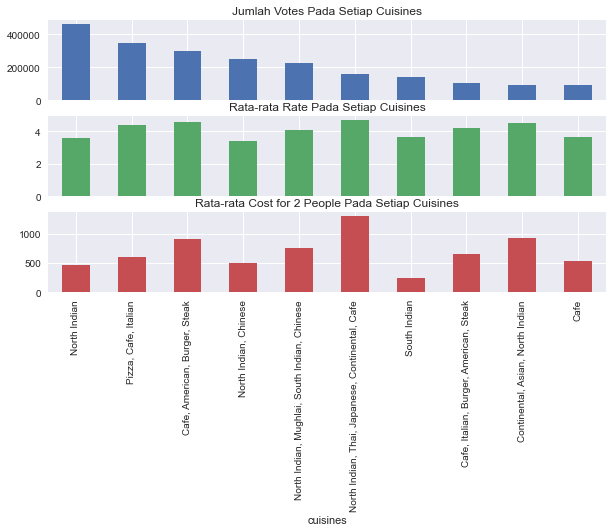

In [67]:
axes = df6gg.plot(kind='bar', subplots=True, figsize=(10,5),legend=False)
axes[0].set_title('Jumlah Votes Pada Setiap Cuisines')
axes[1].set_title('Rata-rata Rate Pada Setiap Cuisines')
axes[2].set_title('Rata-rata Cost for 2 People Pada Setiap Cuisines')
plt.savefig('Best_cuisine')
plt.show()

Berdasarkan plot di atas dapat disimpulkan bahwa cuisines yang paling diminati di kota Bangalore adalah Pizza, Cafe, Italian karena :
1. Jumlah votes pada cuisines ini cukup banyak dan diimbangi dengan rating yang tinggi (4.41). 
2. Harga pada cuisines ini tergolong affordable karena masih berada pada rentang price distribution (di antara INR 138.97 dan INR 1068.86)

# Best listed_in in Bangalore

## Ambil kolom listed_in(type),  rate,  votes , approx_cost(for two people)

In [68]:
df7= df[['listed_in(type)','rate','votes','approx_cost(for two people)']]
df7

,listed_in(type),rate,votes,approx_cost(for two people)
0,Buffet,4.1,775,800.0
1,Buffet,4.1,787,800.0
2,Buffet,3.8,918,800.0
3,Buffet,3.7,88,300.0
4,Buffet,3.8,166,600.0
...,...,...,...,...
51712,Pubs and bars,3.6,27,1500.0
51713,Pubs and bars,NaN,0,600.0
51714,Pubs and bars,NaN,0,2000.0
51715,Pubs and bars,4.3,236,2500.0


In [69]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listed_in(type)              49440 non-null  object 
 1   rate                         41665 non-null  float64
 2   votes                        49440 non-null  int64  
 3   approx_cost(for two people)  49099 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


Berdasarkan informasi di atas dapat dilihat bahwa masih terdapat missing values

## Remove Missing Values

In [70]:
df7.dropna(inplace=True)
df7

,listed_in(type),rate,votes,approx_cost(for two people)
0,Buffet,4.1,775,800.0
1,Buffet,4.1,787,800.0
2,Buffet,3.8,918,800.0
3,Buffet,3.7,88,300.0
4,Buffet,3.8,166,600.0
...,...,...,...,...
51709,Pubs and bars,3.7,34,800.0
51711,Pubs and bars,2.5,81,800.0
51712,Pubs and bars,3.6,27,1500.0
51715,Pubs and bars,4.3,236,2500.0


## Remove Outliers

In [71]:
Q13 = df7['approx_cost(for two people)'].quantile(0.25)
Q33 = df7['approx_cost(for two people)'].quantile(0.75)
IQR3 = Q33-Q13

In [72]:
df7 = df7[~((df7['approx_cost(for two people)'] < (Q13-(1.5*IQR3)))|(df7['approx_cost(for two people)']>(Q33+(1.5*IQR3))))]

In [73]:
df7

,listed_in(type),rate,votes,approx_cost(for two people)
0,Buffet,4.1,775,800.0
1,Buffet,4.1,787,800.0
2,Buffet,3.8,918,800.0
3,Buffet,3.7,88,300.0
4,Buffet,3.8,166,600.0
...,...,...,...,...
51705,Pubs and bars,3.8,128,1200.0
51706,Pubs and bars,3.7,27,1200.0
51708,Pubs and bars,2.8,161,1200.0
51709,Pubs and bars,3.7,34,800.0


## Group by and Sort Value

In [74]:
df7g = df7[['listed_in(type)','votes','rate','approx_cost(for two people)']].groupby(['listed_in(type)']).agg({'votes':'sum','rate':'mean','approx_cost(for two people)':'mean'})

In [75]:
df7gg = df7g.sort_values(by=['votes','rate'], ascending=[False,False])

In [76]:
df7gg

,votes,rate,approx_cost(for two people)
listed_in(type),,,
Delivery,4392577,3.637754,462.662391
Dine-out,3456860,3.629096,515.900008
Cafes,802193,3.866712,618.369418
Desserts,521194,3.773733,392.526080
Drinks & nightlife,463245,3.923901,1091.013384
Buffet,402370,3.826761,941.549296
Pubs and bars,291429,3.921253,1038.283379


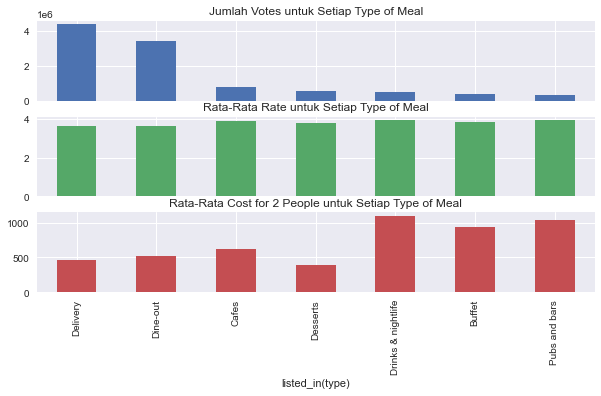

In [77]:
axes1 = df7gg.plot(kind='bar', subplots=True, figsize=(10,5), legend=False)
axes1[0].set_title('Jumlah Votes untuk Setiap Type of Meal')
axes1[1].set_title('Rata-Rata Rate untuk Setiap Type of Meal')
axes1[2].set_title('Rata-Rata Cost for 2 People untuk Setiap Type of Meal')
plt.savefig('listed_in')
plt.show()

## Selisih Votes Delivery dan Drinks&Nightlife

In [78]:
4392577-463245

3929332

Berdasarkan plot di atas listed_in yang paling banyak diminati oleh masyarakat di Bangalore adalah delivery karena mempertimbangkan hal di bawah ini :
1. Jumlah votes yang banyak dan diimbangi dengan rating yang baik, yaitu sebesar 3.64
2. Rata-rata harga listed_in delivery masihh tergolong affordable (meskipun bukan yang paling murah) dibandingkan dengan rata-rata keseluruahan harga listed_in lain 

Additional notes :
1. Rating 3.64 tergolong baik karena berdasarkan rating distribution yang dipaparkan di atas, sebagian besar restaurant mendapatkan rating antara 3.26-4.14
2. Kami tidak menyarankan Drinks & nightlife walaupun memiliki rating yang lebih tinggi (3.92) karena terdapat perbedaan jumlah votes yang cukup signifikan sebesar 3929332 dan harga fnb untuk 2 orang juga cukup tinggi yaitu di atas INR 1000

# Best Restaurant Type in Bangalore

## Ambil kolom rest_type,  rate,  votes , approx_cost(for two people)

In [79]:
df8= df[['rest_type','rate','votes','approx_cost(for two people)']]
df8

,rest_type,rate,votes,approx_cost(for two people)
0,Casual Dining,4.1,775,800.0
1,Casual Dining,4.1,787,800.0
2,"Cafe, Casual Dining",3.8,918,800.0
3,Quick Bites,3.7,88,300.0
4,Casual Dining,3.8,166,600.0
...,...,...,...,...
51712,Bar,3.6,27,1500.0
51713,Bar,NaN,0,600.0
51714,Bar,NaN,0,2000.0
51715,Bar,4.3,236,2500.0


In [80]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rest_type                    49215 non-null  object 
 1   rate                         41665 non-null  float64
 2   votes                        49440 non-null  int64  
 3   approx_cost(for two people)  49099 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


Berdasarkan informasi di atas dapat dilihat bahwa masih terdapat missing values

## Remove Missing Values

In [81]:
df8.dropna(inplace=True)
df8

,rest_type,rate,votes,approx_cost(for two people)
0,Casual Dining,4.1,775,800.0
1,Casual Dining,4.1,787,800.0
2,"Cafe, Casual Dining",3.8,918,800.0
3,Quick Bites,3.7,88,300.0
4,Casual Dining,3.8,166,600.0
...,...,...,...,...
51709,"Casual Dining, Bar",3.7,34,800.0
51711,"Casual Dining, Bar",2.5,81,800.0
51712,Bar,3.6,27,1500.0
51715,Bar,4.3,236,2500.0


## Remove Outliers

In [82]:
Q12 = df8['approx_cost(for two people)'].quantile(0.25)
Q32 = df8['approx_cost(for two people)'].quantile(0.75)
IQR2 = Q32-Q12

In [83]:
df8 = df8[~((df8['approx_cost(for two people)'] < (Q12-(1.5*IQR2)))|(df8['approx_cost(for two people)']>(Q32+(1.5*IQR2))))]

In [84]:
df8

,rest_type,rate,votes,approx_cost(for two people)
0,Casual Dining,4.1,775,800.0
1,Casual Dining,4.1,787,800.0
2,"Cafe, Casual Dining",3.8,918,800.0
3,Quick Bites,3.7,88,300.0
4,Casual Dining,3.8,166,600.0
...,...,...,...,...
51705,"Bar, Casual Dining",3.8,128,1200.0
51706,Pub,3.7,27,1200.0
51708,"Casual Dining, Bar",2.8,161,1200.0
51709,"Casual Dining, Bar",3.7,34,800.0


## Group by and Sort Value

In [85]:
df8g = df8[['rest_type','votes','rate','approx_cost(for two people)']].groupby(['rest_type']).agg({'votes':'sum','rate':'mean','approx_cost(for two people)':'mean'})

In [86]:
df8gg = df8g.sort_values(by=['votes','rate','approx_cost(for two people)'], ascending=[False,False,True]).head(5)

In [87]:
df8gg

,votes,rate,approx_cost(for two people)
rest_type,,,
Casual Dining,3656426,3.702038,727.040414
Quick Bites,1473860,3.545740,329.050054
Cafe,1437325,3.848685,620.950389
"Casual Dining, Bar",830285,3.997570,1082.992327
"Casual Dining, Cafe",506810,4.187726,789.530686


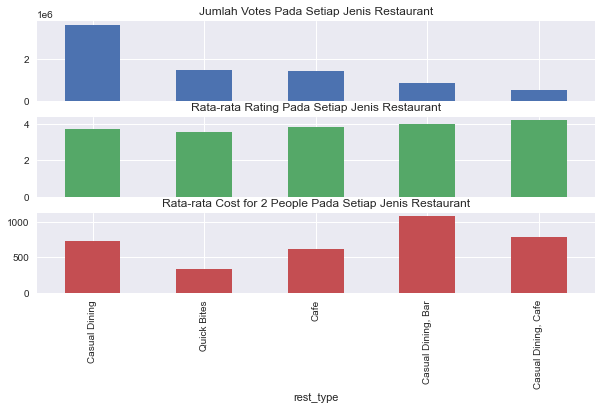

In [88]:
axes2 = df8gg.plot(kind='bar', subplots=True, figsize=(10,5), legend=False)
axes2[0].set_title('Jumlah Votes Pada Setiap Jenis Restaurant')
axes2[1].set_title('Rata-rata Rating Pada Setiap Jenis Restaurant')
axes2[2].set_title('Rata-rata Cost for 2 People Pada Setiap Jenis Restaurant')
plt.savefig('restaurant type')
plt.show()

Berdasarkan plot di atas tipe restaurant yang paling banyak diminati oleh masyarakat di Bangalore adalah Casual Dining karena mempertimbangkan hal di bawah ini :
1. Jumlah votes yang banyak menandakan bahwa restaurant tersebut disukai oleh banyak orang, serta diimbangi dengan rating yang baik, yaitu sebesar 3.702
2. Rata-rata harga listed_in delivery masihh tergolong affordable (meskipun bukan yang paling murah) karena masih berada pada rentang price distribution (INR 138.97 dan INR 1068.86)

Additional notes:
- Rating 3.702 tergolong baik karena masih berada pada rentang distribution (3.26 hingga 4.14)

# Best Location in Bangalore

## Ambil kolom location,  rate,  votes , approx_cost(for two people)

In [89]:
df9= df[['location','rate','votes','approx_cost(for two people)']]
df9

,location,rate,votes,approx_cost(for two people)
0,Banashankari,4.1,775,800.0
1,Banashankari,4.1,787,800.0
2,Banashankari,3.8,918,800.0
3,Banashankari,3.7,88,300.0
4,Basavanagudi,3.8,166,600.0
...,...,...,...,...
51712,Whitefield,3.6,27,1500.0
51713,Whitefield,NaN,0,600.0
51714,Whitefield,NaN,0,2000.0
51715,"ITPL Main Road, Whitefield",4.3,236,2500.0


In [90]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location                     49419 non-null  object 
 1   rate                         41665 non-null  float64
 2   votes                        49440 non-null  int64  
 3   approx_cost(for two people)  49099 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


Berdasarkan informasi di atas dapat dilihat bahwa masih terdapat missing values

## Remove Missing Values

In [91]:
df9.dropna(inplace=True)
df9

,location,rate,votes,approx_cost(for two people)
0,Banashankari,4.1,775,800.0
1,Banashankari,4.1,787,800.0
2,Banashankari,3.8,918,800.0
3,Banashankari,3.7,88,300.0
4,Basavanagudi,3.8,166,600.0
...,...,...,...,...
51709,Whitefield,3.7,34,800.0
51711,Whitefield,2.5,81,800.0
51712,Whitefield,3.6,27,1500.0
51715,"ITPL Main Road, Whitefield",4.3,236,2500.0


## Remove Outliers

In [92]:
Q11 = df9['approx_cost(for two people)'].quantile(0.25)
Q31 = df9['approx_cost(for two people)'].quantile(0.75)
IQR1 = Q31-Q11

In [93]:
df9 = df9[~((df9['approx_cost(for two people)'] < (Q11-(1.5*IQR1)))|(df9['approx_cost(for two people)']>(Q31+(1.5*IQR1))))]

In [94]:
df9

,location,rate,votes,approx_cost(for two people)
0,Banashankari,4.1,775,800.0
1,Banashankari,4.1,787,800.0
2,Banashankari,3.8,918,800.0
3,Banashankari,3.7,88,300.0
4,Basavanagudi,3.8,166,600.0
...,...,...,...,...
51705,Whitefield,3.8,128,1200.0
51706,Whitefield,3.7,27,1200.0
51708,Whitefield,2.8,161,1200.0
51709,Whitefield,3.7,34,800.0


## Group by and Sort Value

In [95]:
df9g = df9[['location','votes','rate','approx_cost(for two people)']].groupby(['location']).agg({'votes':'sum','rate':'mean','approx_cost(for two people)':'mean','location':'count'})

In [96]:
df9gg = df9g.sort_values(by=['votes','rate','approx_cost(for two people)'], ascending=[False,False,True]).head(10)

In [97]:
df9gg

,votes,rate,approx_cost(for two people),location
location,,,,
Koramangala 5th Block,1662375,3.962894,595.654250,2094
Indiranagar,754067,3.787059,572.656347,1615
Koramangala 4th Block,540565,3.887067,663.800000,750
BTM,511753,3.567344,413.010808,3886
JP Nagar,483275,3.660963,534.194890,1683
HSR,466569,3.667695,486.107179,1978
Jayanagar,445411,3.775313,476.096491,1596
Church Street,398403,3.956224,746.576763,482
Koramangala 6th Block,361431,3.767175,526.524390,984


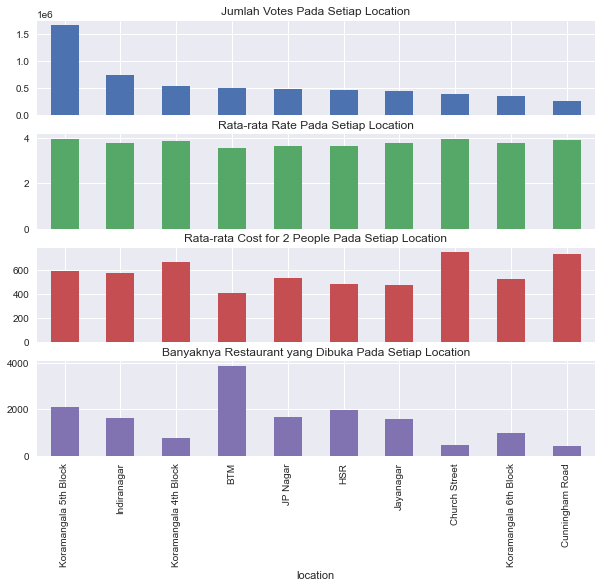

In [98]:
axes3 = df9gg.plot(kind='bar', subplots=True, figsize=(10,8), legend=False)
axes3[0].set_title('Jumlah Votes Pada Setiap Location')
axes3[1].set_title('Rata-rata Rate Pada Setiap Location')
axes3[2].set_title('Rata-rata Cost for 2 People Pada Setiap Location')
plt.title('Banyaknya Restaurant yang Dibuka Pada Setiap Location')
plt.savefig('location')
plt.show()

Berdasarkan plot di atas lokasi restaurant yang cocok digunakan untuk membangun sebuah restaurant di Bangalore adalah di Koramangala 5th Block karena mempertimbangkan hal di bawah ini :
1. Walaupun di Koramangala 5th Block sudah lumayan banyak kompetitor, jumlah votes restaurant di lokasi ini yang banyak menandakan bahwa tempat makan di daerah ini sering dikunjungi oleh banyak orang, serta diimbangi dengan rating yang hampir menyentuh 4.0, yaitu sebesar 3.96
2. Rata-rata harga fnb untuk 2 orang di di lokasi ini masihh tergolong affordable (sekitar INR 595) karena masih berada pada rentang price distribution (INR 138.97 dan INR 1068.86)

# Part 2

In [99]:
df_part2 = df_initial[['dish_liked']]
df_part2

,dish_liked
0,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja..."
1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G..."
2,"Churros, Cannelloni, Minestrone Soup, Hot Choc..."
3,Masala Dosa
4,"Panipuri, Gol Gappe"
...,...
51712,NaN
51713,NaN
51714,NaN
51715,"Cocktails, Pizza, Buttermilk"


In [100]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dish_liked  23492 non-null  object
dtypes: object(1)
memory usage: 772.5+ KB


In [101]:
df_part2.dropna(inplace=True)
df_part2

,dish_liked
0,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja..."
1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G..."
2,"Churros, Cannelloni, Minestrone Soup, Hot Choc..."
3,Masala Dosa
4,"Panipuri, Gol Gappe"
...,...
51705,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood..."
51707,Rooftop Ambience
51708,"Salads, Coffee, Breakfast Buffet, Halwa, Chick..."
51711,"Biryani, Andhra Meal"


In [102]:
df_part2['dish_liked'] = df_part2['dish_liked'].str.lower()

In [103]:
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in df_part2.dish_liked:
      
    val = str(val)
  
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


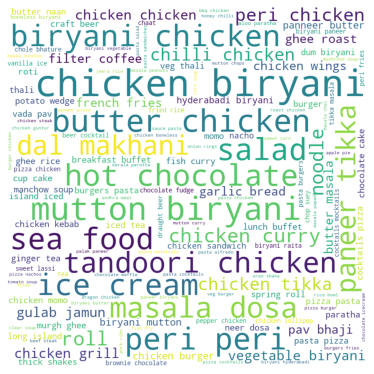

In [104]:
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud')  
plt.show()

Berdasarkan wordcloud kami dapat merekomendasikan makanan dan minuman yang disukai oleh sebagian besar masyarakat di kota Bangalore:
- Makanan : 

Masyarakat di kota Bangalore menyukai makanan biryani dan makanan yang berbahan dasar dari ayam   
- Minuman :

Preferensi masyarakat di Bangalore, India dalam hal minuman adalah hot chocolate 

# Part 3

## Top Restaurant in Bangalore to  open franchise

In [105]:
df5 = df[['name','votes','approx_cost(for two people)','rate','rest_type']]

In [106]:
df5

,name,votes,approx_cost(for two people),rate,rest_type
0,Jalsa,775,800.0,4.1,Casual Dining
1,Spice Elephant,787,800.0,4.1,Casual Dining
2,San Churro Cafe,918,800.0,3.8,"Cafe, Casual Dining"
3,Addhuri Udupi Bhojana,88,300.0,3.7,Quick Bites
4,Grand Village,166,600.0,3.8,Casual Dining
...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,27,1500.0,3.6,Bar
51713,Vinod Bar And Restaurant,0,600.0,NaN,Bar
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,2000.0,NaN,Bar
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,236,2500.0,4.3,Bar


In [107]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49440 non-null  object 
 1   votes                        49440 non-null  int64  
 2   approx_cost(for two people)  49099 non-null  float64
 3   rate                         41665 non-null  float64
 4   rest_type                    49215 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ MB


Berdasarkan informasi di atas masih terdapat missing values

## Remove Missing Values

In [108]:
df5.dropna(inplace=True)
df5

,name,votes,approx_cost(for two people),rate,rest_type
0,Jalsa,775,800.0,4.1,Casual Dining
1,Spice Elephant,787,800.0,4.1,Casual Dining
2,San Churro Cafe,918,800.0,3.8,"Cafe, Casual Dining"
3,Addhuri Udupi Bhojana,88,300.0,3.7,Quick Bites
4,Grand Village,166,600.0,3.8,Casual Dining
...,...,...,...,...,...
51709,The Farm House Bar n Grill,34,800.0,3.7,"Casual Dining, Bar"
51711,Bhagini,81,800.0,2.5,"Casual Dining, Bar"
51712,Best Brews - Four Points by Sheraton Bengaluru...,27,1500.0,3.6,Bar
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,236,2500.0,4.3,Bar


## Remove Outliers

In [109]:
Q1 = df5['approx_cost(for two people)'].quantile(0.25)
Q3 = df5['approx_cost(for two people)'].quantile(0.75)
IQR = Q3-Q1

In [110]:
df5 = df5[~((df5['approx_cost(for two people)'] < (Q1-(1.5*IQR)))|(df5['approx_cost(for two people)']>(Q3+(1.5*IQR))))]

In [111]:
df5

,name,votes,approx_cost(for two people),rate,rest_type
0,Jalsa,775,800.0,4.1,Casual Dining
1,Spice Elephant,787,800.0,4.1,Casual Dining
2,San Churro Cafe,918,800.0,3.8,"Cafe, Casual Dining"
3,Addhuri Udupi Bhojana,88,300.0,3.7,Quick Bites
4,Grand Village,166,600.0,3.8,Casual Dining
...,...,...,...,...,...
51705,Izakaya Gastro Pub,128,1200.0,3.8,"Bar, Casual Dining"
51706,Red Glow,27,1200.0,3.7,Pub
51708,Keys Cafe - Keys Hotel,161,1200.0,2.8,"Casual Dining, Bar"
51709,The Farm House Bar n Grill,34,800.0,3.7,"Casual Dining, Bar"


## Top 10 Jenis Restaurant yang Paling Banyak Dibuka di Bangalore

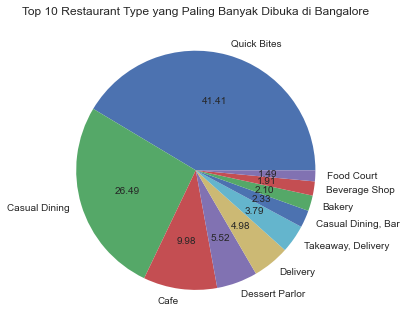

In [112]:
df5['rest_type'].value_counts().head(10).plot(kind='pie',autopct ='%.2f')
plt.ylabel('')
plt.title('Top 10 Restaurant Type yang Paling Banyak Dibuka di Bangalore')
plt.savefig('top 10 rest type')
plt.show()

Berdasarkan pie chart di atas 41.41% Restaurant di Bangalore berjenis Quick Bites

## Group by and Sort Values

In [113]:
df5g = df5[['name','votes','approx_cost(for two people)','rate','rest_type']].groupby(['name','rest_type']).agg({'votes':'sum','approx_cost(for two people)':'mean','rate':'mean'})

In [114]:
df5gg = df5g.sort_values(by=['votes','rate','approx_cost(for two people)'], ascending=[False,False,True]).head(10)

In [115]:
df5gg

,,votes,approx_cost(for two people),rate
name,rest_type,,,
Onesta,"Casual Dining, Cafe",347520,600.000000,4.410588
Truffles,"Cafe, Casual Dining",247239,900.000000,4.646429
Empire Restaurant,Casual Dining,228483,749.137931,4.086207
Hammered,"Pub, Cafe",178915,1285.000000,4.657500
The Black Pearl,"Casual Dining, Bar",136485,1400.000000,4.700000
Meghana Foods,Casual Dining,129557,633.333333,4.343333
Smally's Resto Cafe,Cafe,102877,650.000000,4.172222
Gilly's Restobar,"Pub, Casual Dining",98808,1087.500000,4.462500
House Of Commons,Bar,90573,1000.000000,4.723810


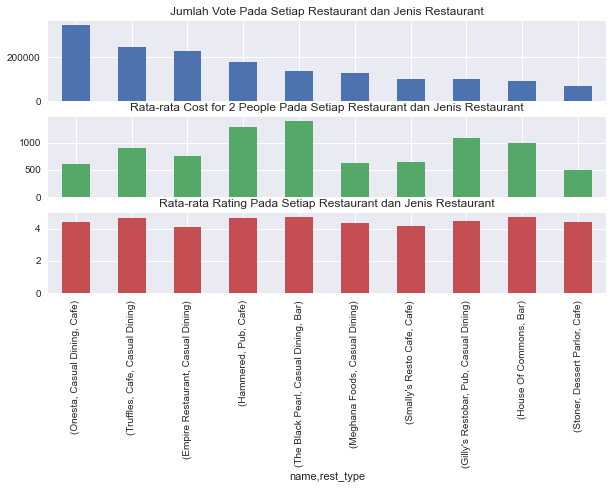

In [116]:
axes4 = df5gg.plot(kind='bar', subplots=True, figsize=(10,5), legend=False)
axes4[0].set_title('Jumlah Vote Pada Setiap Restaurant dan Jenis Restaurant')
axes4[1].set_title('Rata-rata Cost for 2 People Pada Setiap Restaurant dan Jenis Restaurant')
axes4[2].set_title('Rata-rata Rating Pada Setiap Restaurant dan Jenis Restaurant')
plt.savefig('franchise')
plt.show()

Berdasarkan plot di atas dapat dilihat bahwa ONESTA merupakan restaurant yang cocok dikembangkan sebagai waralaba (franchise) untuk ke depannya karena : 
1. Rata-rata harga perkiraan untuk 2 orang masih affordable (INR 600)
2. Meski memiliki jumlah votes sangat banyak, ratenya sangat tinggi (4.41)
3. Jenis restaurantnya tergolong pada tipe restaurant Casual Dining, Cafe yang tidak termasuk dalam top 10 jenis restaurant yang paling banyak dibuka di Bangalore, sehingga apabila ingin membuka franchise tidak memiliki kompetitor yang terlalu banyak 

Additional notes : 
1. Harga masih affordable karena berdasarkan price distribution yang telah dipaparkan di atas Onesta memiliki approx cost yang berada pada rentang 138.97 dan 1068.86